<b>SEISMIC ACTIVITY IN THE SOUTHEASTERNMOST HAWAIIAN ISLAND - HAWAI'I<b/>

According to the Wikipedia, the island of Hawaiʻi was built from five separated shield volcanoes that erupted somewhat sequentially, one overlapping the other. These are (from oldest to youngest):

- <p>Kohala – extinct.<p/>
    
- <p>Mauna Kea – dormant, he highest volcano on the Island of Hawai‘i, erupted most recently between about 6,000 and 4,500 years ago from at least seven separate summit-area vents, producing lava flows and cinder cones. Glaciers covered parts of the volcano's summit area during the recent ice ages, the only Hawaiian volcano known to have been glaciated.<p/> 
    
- <p>Hualālai – dormant, the third most active volcano on the Island of Hawai‘i, has erupted three times in the past 1,000 years and eight times in the past 1,500 years. The most recent eruption in 1801 generated a lava flow that reached the ocean and now underlies the Kona International Airport. Lava flows less than 5,000 years old cover about 80 percent of the volcano.<p/>
    
- <p>Mauna Loa – active, the largest volcano on Earth, has erupted 33 times since 1843. The most recent eruption in 1984 lasted 22 days and produced lava flows which reached to within about 7.2 km (4.5 miles) of Hilo, the largest population center on the Island of Hawai‘i. Lava flows less than 4,000 years old cover about 90 percent of the volcano.<p/>
    
- <p>Kīlauea – active: the youngest and most active volcano on the Island of Hawai‘i, has erupted almost continuously since 1983 to 2018 at Pu‘u ‘Ō‘ō and other vents along the volcano's East Rift Zone. From 2008 to 2018, there was a lava lake within Halema‘uma‘u Crater at the volcano's summit. About 90 percent of the volcano is covered with lava flows less than 1,100 years in age.<p/> 
 

<p><img src=https://www.smv.org/storage/app/media/Blog/2019.08.19%20hawaii%20map.jpg><p/>

The purpose of this notebook is to analyse the seismicity in the southeasternmost Hawaiian island, hawai'i, spot trends, and to take a closer look at the three major earthquakes that happened in the region over the past five years. 

In [1]:
# IMPORTING THE NECESSARY LIBERIES 

import numpy as np
from pyproj import Proj
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
from obspy.clients.fdsn import Client
from obspy.signal.tf_misfit import plot_tfr
from obspy.imaging.cm import obspy_sequential


In [2]:
# SETTING PARAMETERS

client = Client("IRIS")
startt = UTCDateTime("2015-01-01")
endt = UTCDateTime("2020-06-01")
lat = 19.6558
lon = -155.4959
minmag = 2.0
maxrad=.7

Because of the amount of events it might take 1-2 min for the next cell to run. 

In [3]:
# RETRIEVING THE CATALOG AND PRINTING THE EVENTS 

cat = client.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag, catalog="NEIC PDE")
print(cat)

38818 Event(s) in Catalog:
2020-05-31T13:43:59.970000Z | +19.209, -155.415 | 2.31 Ml
2020-05-31T06:34:31.170000Z | +19.233, -155.413 | 2.38 Ml
...
2015-01-02T06:41:45.700000Z | +19.223, -155.059 | 2.9 Ml
2015-01-01T16:15:54.900000Z | +20.081, -155.875 | 2.8 Ml
To see all events call 'print(CatalogObject.__str__(print_all=True))'


The code in the cell below allows to convert the latitudes and longitudes into UTM, making it much easier to plot.

/Users/dayolcarvalho/prgs/miniconda3/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


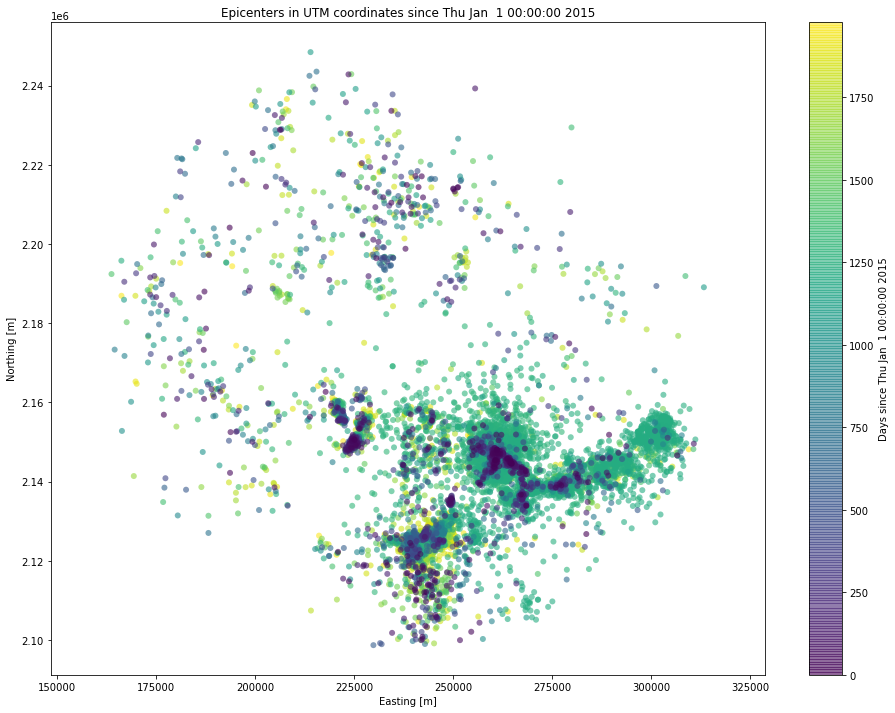

In [4]:
# PLOTTING THE EVENTS 

alltimes=np.zeros((cat.count(),1))
alllongs=np.zeros((cat.count(),1))
alllats =np.zeros((cat.count(),1))
alldepth =np.zeros((cat.count(),1))
for a in range(cat.count()):
    alltimes[a]=cat[a].origins[0].time.matplotlib_date
    alllongs[a]=cat[a].origins[0].longitude
    alllats[a] =cat[a].origins[0].latitude
    alldepth[a] =cat[a].origins[0].depth

alltimes = alltimes-alltimes.min()

#----------------------------------------------------------

projdefs = Proj("+proj=utm +zone=05Q, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
UTMx, UTMy = projdefs(alllongs, alllats)  

fig = plt.figure(figsize=(16,12))

plt.scatter(UTMx,UTMy,c=alltimes, alpha=0.6, edgecolors='none', cmap=obspy_sequential)
plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
titlestring='Epicenters in UTM coordinates since {}'.format(startt.ctime())
plt.title(titlestring)
plt.axes().set_aspect('equal', 'datalim')
cbar = plt.colorbar()
cbar.set_label('Days since {}'.format(startt.ctime()), rotation=90);

The map above shows the distribution of events over the hawai'i island. The color bar shows the passage of time from the starttime, January 1st 2015 to the endtime, June 1st 2020. The activity in the region seems to be concentrated on the south-east part of the island. There is some activity in the north-west part of the island; the events in this region seem to be a mix of recent and old events. The cluster of recent events in the southeast part of the region is composed of mostly recent events.  

In the cell below we will be storing the time and magnitude of the events into separate lists using the times.append syntax. 

In [5]:
# STORING TIME AND MAGS

times = [] 
mags = [] 
for event in cat: 
    times.append(event.origins[0].time.datetime) 
    mags.append(event.magnitudes[0].mag)
#print(times[2], mags[2])
mtimes = mdates.date2num(times); 

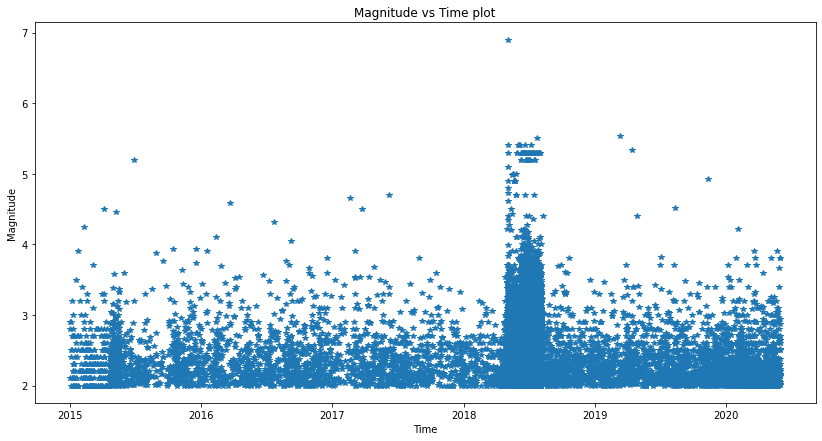

In [6]:
# CLOSER LOOK AT THE MAGNITUDE OF THE EVENTS 

plt.figure(figsize=(14,7))
plt.plot_date(mtimes,mags,marker='*')
plt.title('Magnitude vs Time plot')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show();

The majority of the events seem to be between Mw 2.0-3.0. From 2015 to 2017 the region only registered one earthquake with magnitude larger than 5.0. There is a decrease in magnitude from 2017 to the beginning of 2018. From 2018 to 2019 there is an increase in the magnitude of the events. It is during this period that the largest earthquake in the region over the past five years is registered, Mw ~7.0.    

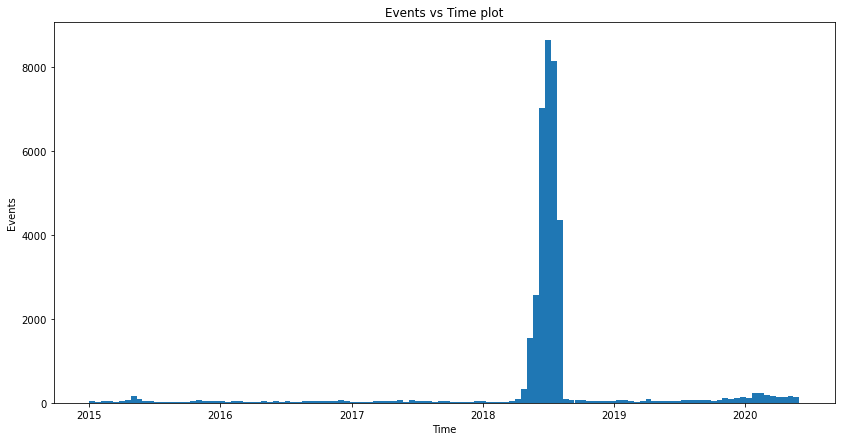

In [7]:
# CLOSER LOOK AT THE NUMBER OF EVENTS 

fig2, axes = plt.subplots(figsize=(14, 7))
axes.hist(mtimes, bins=120)
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.title('Events vs Time plot')
plt.xlabel('Time')
plt.ylabel('Events')
plt.show();

There is not much activity in the region from 2015 to 2017. There seems to be a few clusters of events during this period of time, but they seem to be composed by just a couple of hundred or less events. After 2018 there is a rapid increase of activity in the region, a swarm of events between 2018 and 2019. During this period the number of events jumps from hundreds to almost ten thousand events. 

/Users/dayolcarvalho/prgs/miniconda3/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


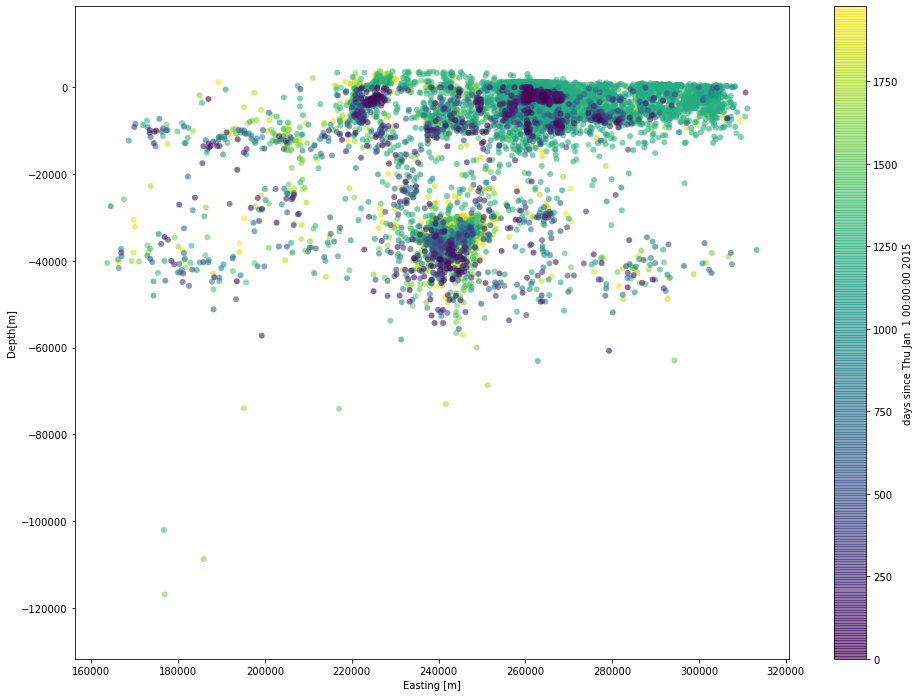

In [8]:
# LOOKING AT DEPTH VS TIME 

fig = plt.figure(figsize=(16,12))
plt.scatter(UTMx,-alldepth,c=alltimes, alpha=0.6, edgecolors='none', cmap=obspy_sequential)
plt.xlabel('Easting [m]')
plt.ylabel('Depth[m]') 
plt.axes().set_aspect('equal', 'datalim') 
cbar = plt.colorbar()
cbar.set_label('days since {}'.format(startt.ctime()), rotation=90); 

The majority of events seems to happen at shallow depths, no more than 20km. There is a cluster of recent and old events at 40km. There is at least three events that exceed 100km. The events seem to me migrating to the south-east part of the region with a lot of recent events happening in this area of the island. 

EVENTS 

In the next couple of cells, we will be taking a closer look at three different events that happened in the past 3 years in this region. The first event is a 6.9 Mw that struck the archipelago on May 2018. It is the largest earthquake in the region since the 7.4 Mw in 1975. The second is a 5.5 Mw earthquake that struck the island on March 2019. The last one is the largest earthquake that happened in the region this year, 4.2 Mw on February 2020.

In [9]:
# SETTING UP THE 3 EVENTS

irisclient = Client('IRIS') 

starttime=UTCDateTime(2018,5,4,22,32,54); # event 1
#starttime=UTCDateTime(2019,3,13,10,55,13); # event 2 
#starttime=UTCDateTime(2020,2,3,6,37,10); # event 3 

endtime=starttime+60

#-------------------------------

client = Client("IRIS")
network = "HV"
station = "KLUD"
location = ""
channel = "*"

st = client.get_waveforms(network, station, location, channel, starttime, endtime)

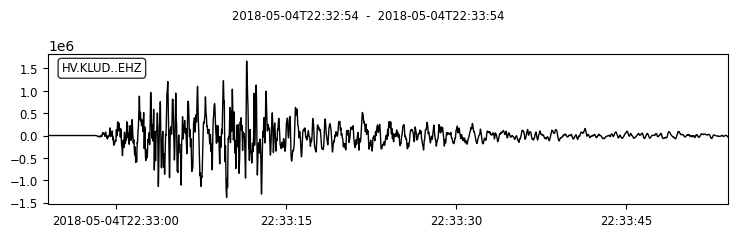

In [10]:
# PLOTTING 

tr = st[0]
fig = tr.plot()

/Users/dayolcarvalho/prgs/miniconda3/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img_tfr = ax_tfr.pcolormesh(x, y, _tfr[itr], cmap=cmap)


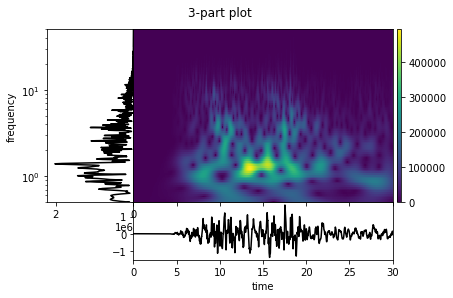

In [11]:
# CREATING A 3-PART PLOT (AMPLITUDE SPECTRUM, THE WAVEFORM AND THE SPECTROGRAM)


stime1 = UTCDateTime(2018,5,4,22,32,54)
etime1 = UTCDateTime(2018,5,4,22,33,24)

stime2 = UTCDateTime(2019,3,13,10,55,13)
etime2 = UTCDateTime(2019,3,13,10,55,43)

stime3 = UTCDateTime(2020,2,3,6,37,10)
etime3 = UTCDateTime(2020,2,3,6,37,40)


# The parameters below must be changed in order to look at the desired event. 
# They should match the event set in the cell above in order to work. 

stime=stime1  
etime=etime1
tr.trim(stime,etime)

tr.detrend('linear')
tr.taper
freqmin=0.5
freqmax=50

ee = str(tr)

npts = tr.stats.npts
dt = tr.stats.delta
t = np.linspace(0, dt * npts, npts)


afig=plot_tfr(tr.data, dt=dt, fmin=freqmin, fmax=freqmax, mode='absolute', fft_zero_pad_fac=2, show=False)
afig.suptitle('3-part plot');

The events peak at different frequencies. The first one peaks at 1.5 Hz, the second peaks at 2.3 Hz and the third event peaks at 3.8 Hz. There is a burst of energy 15 seconds into the two the first two events. The burst of energy shows up earlier in the third event, 13 seconds into the event. The P and S arrivals can be seen in the waveform plot for all three events. 

The activity in the region seems to be caused mostly by the Kīlauea volcano. It seems like the Mw 6.9 definitely played an important role in the 2018 eruption of the volcano Kīlauea. According to the article “The 2018 rift eruption and summit collapse of Kilauea Volcano”, the earthquake accelerated the summit subsidence and lava lake withdraw. Something that happened before, and it was followed by explosive activity that included ash emissions and ejection of blocks onto the caldera floor. Also, according with the same article, “By 10 May, sporadic ejections of mixed juvenile and lithic ash reached heights of ~2000 m above the summit eruptive vent, accompanied by hundreds of M3-4 summit earthquakes per day.” (C. A. Neal et al., 2018). 

<b> References <b/> 

<p>Neal, C. A., Brantley, S. R., Antolik, L., Babb, J. L., Burgess, M., Calles, K., … Damby, D. (2018). 
The 2018 rift eruption and summit collapse of Kīlauea Volcano. Science, 363(6425), 367–374.  
doi: 10.1126/science.aav7046<p/>
    
<p>Wikipedia contributors. (2020, September 15). Hawaii (island). In Wikipedia, The Free Encyclopedia. Retrieved 12:52, September 23, 2020, from https://en.wikipedia.org/w/index.php?title=Hawaii_(island)&oldid=978589420<p/>

The events USGS pages

https://earthquake.usgs.gov/earthquakes/eventpage/hv70116556/executive,
https://earthquake.usgs.gov/earthquakes/eventpage/hv70863117/executive,
https://earthquake.usgs.gov/earthquakes/eventpage/hv71365812/executive.

More useful links

https://www.usgs.gov/volcanoes/mauna-loa,
https://volcanoes.usgs.gov/volcanoes/kilauea/status.html,
https://www.usgs.gov/observatories/hawaiian-volcano-observatory,
https://www.usgs.gov/observatories/hawaiian-volcano-observatory/active-volcanoes-hawaii.

